# **DataSet**

In [102]:
url_walmart_sales = 'https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/04_Data%20Manipulation%20with%20pandas/_dataset/Walmart_Sales.csv'
url_homelessness  = 'https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/04_Data%20Manipulation%20with%20pandas/_dataset/homelessness.csv'
url_sales  = 'https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/04_Data%20Manipulation%20with%20pandas/_dataset/sales_subset.csv'
url_temperatures  = 'https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/04_Data%20Manipulation%20with%20pandas/_dataset/temperatures.csv'
url_airbump = 'https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/04_Data%20Manipulation%20with%20pandas/_dataset/airline_bumping.csv'

# **Data Manipulation with pandas**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [103]:
df_walmart = pd.read_csv(url_walmart_sales)
df_homeless = pd.read_csv(url_homelessness)
df_sales = pd.read_csv(url_sales)
df_temp = pd.read_csv(url_temperatures)
airline_bumping = pd.read_csv(url_airbump)

## **01 → Transforming DataFrames**

### **Inspecting a DataFrame**


In [5]:
df_homeless = df_homeless.drop(['Unnamed: 0'], axis=1)

In [6]:
df_homeless.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [7]:
# information on each of the columns
df_homeless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


In [8]:
# Returns the number of rows and columns
df_homeless.shape

(51, 5)

In [9]:
# summary statistics
df_homeless.describe()

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


from the summary statistics we can see that the average number of homeless individuals in each state is about `7226`.

In [10]:
# Missing Values
df_homeless.isna().sum()

region            0
state             0
individuals       0
family_members    0
state_pop         0
dtype: int64

In [11]:
# Number of Unique values
df_homeless.nunique()

region             9
state             51
individuals       49
family_members    50
state_pop         51
dtype: int64

### **Parts of DataFrame**

In [12]:
# values of homelessness
df_homeless['region'].values

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'Pacific', 'Mountain', 'New England', 'South Atlantic',
       'South Atlantic', 'South Atlantic', 'South Atlantic', 'Pacific',
       'Mountain', 'East North Central', 'East North Central',
       'West North Central', 'West North Central', 'East South Central',
       'West South Central', 'New England', 'South Atlantic',
       'New England', 'East North Central', 'West North Central',
       'East South Central', 'West North Central', 'Mountain',
       'West North Central', 'Mountain', 'New England', 'Mid-Atlantic',
       'Mountain', 'Mid-Atlantic', 'South Atlantic', 'West North Central',
       'East North Central', 'West South Central', 'Pacific',
       'Mid-Atlantic', 'New England', 'South Atlantic',
       'West North Central', 'East South Central', 'West South Central',
       'Mountain', 'New England', 'South Atlantic', 'Pacific',
       'South Atlantic', 'East North Central', 'Mountain'], dty

In [13]:
# values count of region
df_homeless['region'].value_counts()

South Atlantic        9
Mountain              8
West North Central    7
New England           6
Pacific               5
East North Central    5
East South Central    4
West South Central    4
Mid-Atlantic          3
Name: region, dtype: int64

In [14]:
# column index of homelessness
df_homeless.columns

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [15]:
# Row index of homelessness
df_homeless.index

RangeIndex(start=0, stop=51, step=1)

### **Sorting rows**

In [16]:
df_homeless.sort_values(['individuals'], ascending=True) # By default ascending is True

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358
29,New England,New Hampshire,835.0,615.0,1353465
41,West North Central,South Dakota,836.0,323.0,878698
26,Mountain,Montana,983.0,422.0,1060665
48,South Atlantic,West Virginia,1021.0,222.0,1804291
24,East South Central,Mississippi,1024.0,328.0,2981020


In [17]:
# Sorting homelessness by descending family members
df_homeless.sort_values(['family_members'], ascending=False).head()

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588
21,New England,Massachusetts,6811.0,13257.0,6882635
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666


In [18]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = df_homeless.sort_values(['region', 'family_members'], ascending=[True, False])

# Print the top few rows
display(homelessness_reg_fam.head())

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497


### **Subsetting columns**

In [19]:
# Select the individuals column
df_homeless['individuals'].head()

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64

In [20]:
# Select the state and family_members columns
state_fam = df_homeless[['state', 'family_members']]

# Print the head of the result
display(state_fam.head())

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0


In [21]:
# Select only the individuals and state columns, in that order
ind_state = df_homeless[['individuals', 'state']]

# Print the head of the result
display(ind_state.head())

,individuals,state
0,2570.0,Alabama
1,1434.0,Alaska
2,7259.0,Arizona
3,2280.0,Arkansas
4,109008.0,California


### **Subsetting Rows**

In [22]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = df_homeless[df_homeless['individuals'] > 10000]

# See the result
display(ind_gt_10k)

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,Pacific,Oregon,11139.0,3337.0,4181886
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869


In [23]:
# Filter for rows where region is Mountain
mountain_reg = df_homeless[df_homeless['region'] == "Mountain"]

# See the result
display(mountain_reg)

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
5,Mountain,Colorado,7607.0,3250.0,5691287
12,Mountain,Idaho,1297.0,715.0,1750536
26,Mountain,Montana,983.0,422.0,1060665
28,Mountain,Nevada,7058.0,486.0,3027341
31,Mountain,New Mexico,1949.0,602.0,2092741
44,Mountain,Utah,1904.0,972.0,3153550
50,Mountain,Wyoming,434.0,205.0,577601


In [24]:
# Filter for rows where family_members is less than 1000 and region is Pacific

fam_less_1k = df_homeless['family_members'] < 1000
reg_is_Pac = df_homeless['region'] == 'Pacific'
fam_lt_1k_pac = df_homeless[fam_less_1k & reg_is_Pac]

display(fam_lt_1k_pac)

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


In [25]:
 # one liner
fam_lt_1k_pac = df_homeless[(df_homeless['family_members'] < 1000) & (df_homeless['region'] == 'Pacific')] 

# See the result
display(fam_lt_1k_pac)

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


### **Subsetting rows by categorical variables**

In [26]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
SA = df_homeless['region'] == 'South Atlantic'
MA = df_homeless['region'] == 'Mid-Atlantic'

# using Bitwise `|` for subsetting 
south_mid_atlantic = df_homeless[SA | MA]

# See the result
print(south_mid_atlantic)

            region                 state  individuals  family_members  \
7   South Atlantic              Delaware        708.0           374.0   
8   South Atlantic  District of Columbia       3770.0          3134.0   
9   South Atlantic               Florida      21443.0          9587.0   
10  South Atlantic               Georgia       6943.0          2556.0   
20  South Atlantic              Maryland       4914.0          2230.0   
30    Mid-Atlantic            New Jersey       6048.0          3350.0   
32    Mid-Atlantic              New York      39827.0         52070.0   
33  South Atlantic        North Carolina       6451.0          2817.0   
38    Mid-Atlantic          Pennsylvania       8163.0          5349.0   
40  South Atlantic        South Carolina       3082.0           851.0   
46  South Atlantic              Virginia       3928.0          2047.0   
48  South Atlantic         West Virginia       1021.0           222.0   

    state_pop  
7      965479  
8      701547  
9 

In [27]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = df_homeless[df_homeless["state"].isin(canu)]

# See the result
display(mojave_homelessness)

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
4,Pacific,California,109008.0,20964.0,39461588
28,Mountain,Nevada,7058.0,486.0,3027341
44,Mountain,Utah,1904.0,972.0,3153550


### **Adding new columns**

In [28]:
# Add total col as sum of individuals and family_members
df_homeless['total'] = df_homeless['individuals'] + df_homeless['family_members']

# Add p_individuals col as proportion of individuals
# To get the proportion of homeless who are individuals,
# divide the individuals column by the total column.

df_homeless['p_individuals'] = (df_homeless['individuals'] / df_homeless['total'])

# See the result
display(df_homeless.head(5))

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


In [29]:
# Percentage of homeless in the overall state population 
df_homeless['%age_homeless'] = ((df_homeless['total'] / df_homeless['state_pop']))*100

# See the result
display(df_homeless.head(5))

,region,state,individuals,family_members,state_pop,total,p_individuals,%age_homeless
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398,0.070258
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310,0.274234
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834,0.137817
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708,0.090108
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704,0.329363


In [30]:
df_homeless[df_homeless['total'] == df_homeless['total'].max()]

,region,state,individuals,family_members,state_pop,total,p_individuals,%age_homeless
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704,0.329363


In [31]:
df_homeless[df_homeless['%age_homeless'] == df_homeless['%age_homeless'].max()]

,region,state,individuals,family_members,state_pop,total,p_individuals,%age_homeless
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.54606,0.984111


Even though `California` has highest number of homeless but the `District of Columbia` has higher percentage when compare with state population.

In [32]:
df_homeless.describe()

,individuals,family_members,state_pop,total,p_individuals,%age_homeless
count,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,7225.784314,3504.882353,6.405637e+06,10730.666667,0.685759,0.158729
std,15991.025083,7805.411811,7.327258e+06,21777.558637,0.105124,0.152383
min,434.000000,75.000000,5.776010e+05,542.000000,0.339396,0.045354
25%,1446.500000,592.000000,1.777414e+06,2318.500000,0.633513,0.085902
50%,3082.000000,1482.000000,4.461153e+06,4907.000000,0.691041,0.107132
75%,6781.500000,3196.000000,7.340946e+06,9448.500000,0.744996,0.141940
max,109008.000000,52070.000000,3.946159e+07,129972.000000,0.935578,0.984111


**Which state has the highest number of homeless `individuals` per `10,000` people in the state?**

In [33]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
df_homeless["indiv_per_10k"] = 10000 * df_homeless["individuals"] / df_homeless["state_pop"]

# Subset rows for indiv_per_10k greater than 20
high_homelessness = df_homeless[df_homeless["indiv_per_10k"] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_per_10k"]]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


`District of Columbia` has the **highest** number of homeless `individuals` - almost `54 per ten thousand people`. This is almost double the number of the next-highest state, `Hawaii`. If you combine new column addition, row subsetting, sorting, and column selection, you can answer lots of questions like this.

## **02 → Aggregating DataFrames**

Dataset: `df_sales` 

In [34]:
# Print the head of the sales DataFrame
display(df_sales.head())

print(df_sales.info())
print("-"*100)


display(df_sales.describe())
print("-"*100)


# Print the mean of weekly_sales
print("mean: ", df_sales['weekly_sales'].mean())

# Print the median of weekly_sales
print("median: ", df_sales['weekly_sales'].median())

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB
None
----------------------------------------------------------------------------------------------------


,Unnamed: 0,store,department,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
count,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000
mean,5386.500000,15.441897,45.218118,23843.950149,15.731978,0.749746,8.082009
std,3110.330234,11.534511,29.867779,30220.387557,9.922446,0.059494,0.624355
min,0.000000,1.000000,1.000000,-1098.000000,-8.366667,0.664129,3.879000
25%,2693.250000,4.000000,20.000000,3867.115000,7.583333,0.708246,7.795000
50%,5386.500000,13.000000,40.000000,12049.065000,16.966667,0.743381,8.099000
75%,8079.750000,20.000000,72.000000,32349.850000,24.166667,0.781421,8.360000
max,10773.000000,39.000000,99.000000,293966.050000,33.827778,1.107674,9.765000


----------------------------------------------------------------------------------------------------
mean:  23843.95014850566
median:  12049.064999999999


### **Summarizing dates**

In [35]:
# Print the maximum of the date column
print(df_sales['date'].max())

# Print the minimum of the date column
print(df_sales['date'].min())

2012-10-26
2010-02-05


### **Efficient summaries**

`.agg()` method allows you to apply your own custom functions to a DataFrame.

In [36]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Method:1 We are abke to apply only one fuction at a time
# Print IQR of the temperature_c column
print(iqr(df_sales["temperature_c"]))

# Method:2 using `.agg( )`
print(df_sales["temperature_c"].agg(iqr))

16.583333333333336
16.583333333333336


In [37]:
# Applying the function on differnet columns at once
print(df_sales[["temperature_c", 'fuel_price_usd_per_l', 'unemployment']].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [38]:
import numpy as np

# IQR and median
display(df_sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median, np.mean]))

,temperature_c,fuel_price_usd_per_l,unemployment
iqr,16.583333,0.073176,0.565000
median,16.966667,0.743381,8.099000
mean,15.731978,0.749746,8.082009


### **Cumulative statistics**

`cumsum`

In [39]:
import pandas as pd

# Create a Series
data = pd.Series([1, 2, 3, 4, 5])

# Calculate cumulative sum
cumulative_sum = data.cumsum()

print(cumulative_sum)

0     1
1     3
2     6
3    10
4    15
dtype: int64


`cummax`

In [40]:
import pandas as pd

# Create a Series
data = pd.Series([1, 3, 2, 4, 5])

# Calculate cumulative maximum
cumulative_max = data.cummax()

print(cumulative_max)

0    1
1    3
2    3
3    4
4    5
dtype: int64


In [41]:
# Sort sales_1_1 by date
sales_1_1 = df_sales.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
display(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]].head(10))

,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,24924.50,24924.50
6437,2010-02-05,38597.52,63522.02,38597.52
1249,2010-02-05,3840.21,67362.23,38597.52
6449,2010-02-05,17590.59,84952.82,38597.52
6461,2010-02-05,4929.87,89882.69,38597.52
6473,2010-02-05,20578.79,110461.48,38597.52
6485,2010-02-05,3953.70,114415.18,38597.52
1237,2010-02-05,6916.00,121331.18,38597.52
6425,2010-02-05,5089.54,126420.72,38597.52
6506,2010-02-05,6261.35,132682.07,38597.52


Not all functions that calculate on columns return a single number. Some, like the cumulative statistic functions, return a whole column.

### **Dropping duplicates**

In [42]:
df_sales.nunique()

Unnamed: 0              10774
store                      12
type                        2
department                 80
date                      123
weekly_sales            10353
is_holiday                  2
temperature_c             539
fuel_price_usd_per_l      319
unemployment              126
dtype: int64

In [43]:
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({'A': [1, 1, 2, 3, 3, 4],
                   'B': ['a', 'b', 'c', 'd', 'd', 'e']})

# display the original DataFrame
print('Original DataFrame:')
display(df)

df_dups = df.duplicated()
display(df_dups)

# drop duplicates and display the result
df_drop = df.drop_duplicates()
print('DataFrame after dropping duplicates:')
display(df_drop)

Original DataFrame:


,A,B
0,1,a
1,1,b
2,2,c
3,3,d
4,3,d
5,4,e


0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

DataFrame after dropping duplicates:


,A,B
0,1,a
1,1,b
2,2,c
3,3,d
5,4,e


In [44]:
print(df_sales.shape)

# Drop duplicate store/type combinations
store_types = df_sales.drop_duplicates(subset=['store', 'type'])
display(store_types.head())
print(store_types.shape)

(10774, 10)


,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


(12, 10)


In [45]:
# Drop duplicate store/department combinations
store_depts = df_sales.drop_duplicates(subset=['store', 'department'])
display(store_depts.head())
print(store_depts.shape)

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


(929, 10)


In [46]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = df_sales[df_sales['is_holiday']].drop_duplicates('date')

# Print date col of holiday_dates
display(holiday_dates)
print(holiday_dates.shape)

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
498,498,1,A,45,2010-09-10,11.47,True,25.938889,0.677602,7.787
691,691,1,A,77,2011-11-25,1431.00,True,15.633333,0.854861,7.866
2315,2315,4,A,47,2010-02-12,498.00,True,-1.755556,0.679715,8.623
6735,6735,19,A,39,2012-09-07,13.41,True,22.333333,1.076766,8.193
6810,6810,19,A,47,2010-12-31,-449.00,True,-1.861111,0.881278,8.067
6815,6815,19,A,47,2012-02-10,15.00,True,0.338889,1.010723,7.943
6820,6820,19,A,48,2011-09-09,197.00,True,20.155556,1.038197,7.806


(7, 10)


The holiday weeks correspond to the Superbowl in February, Labor Day in September, Thanksgiving in November, and Christmas in December. Now that the duplicates are removed, it's time to do some counting.

### **Counting categorical variables**

In [47]:
# Count the number of stores of each type
store_counts = df_sales["type"].value_counts()
print(store_counts)

A    9872
B     902
Name: type, dtype: int64


In [48]:
# Get the proportion of stores of each type
store_props = df_sales["type"].value_counts(normalize=True)
print(store_props)

A    0.91628
B    0.08372
Name: type, dtype: float64


In [49]:
# Count the number of each department number and sort
dept_counts_sorted = df_sales["department"].value_counts(sort=True)
print(dept_counts_sorted)

1     144
55    144
71    144
67    144
60    144
     ... 
50     72
78     56
77     39
39      7
43      2
Name: department, Length: 80, dtype: int64


In [50]:
# Get the proportion of departments of each number and sort
dept_props_sorted = df_sales["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

1     0.013366
55    0.013366
71    0.013366
67    0.013366
60    0.013366
        ...   
50    0.006683
78    0.005198
77    0.003620
39    0.000650
43    0.000186
Name: department, Length: 80, dtype: float64


### **Grouped summary statistics**

In [51]:
df_sales['type'].unique()

array(['A', 'B'], dtype=object)

In [52]:
df_sales['type'].value_counts()

A    9872
B     902
Name: type, dtype: int64

In [53]:
# Calc total weekly sales
sales_all = df_sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = df_sales[df_sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = df_sales[df_sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = df_sales[df_sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


- About `91%` of sales occurred in stores of `type A`.
- `9%` in stores of `type B`, and
- there are `No sales` records for stores of `type C`.

 Now see if you can do this calculation using `.groupby()`

### **Calculations with `.groupby()`**

In [54]:
import pandas as pd

# Create a sample sales dataset
sales_data = pd.DataFrame({
    'product_category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics'],
    'product_name': ['Laptop', 'T-Shirt', 'TV', 'Jeans', 'Smartphone'],
    'sales': [1500, 25, 800, 50, 1200]
})

display(sales_data)

# Group the data by product category and calculate sum of sales for each group
grouped_sales = sales_data.groupby(['product_category'])['sales'].sum()

display(grouped_sales)

,product_category,product_name,sales
0,Electronics,Laptop,1500
1,Clothing,T-Shirt,25
2,Electronics,TV,800
3,Clothing,Jeans,50
4,Electronics,Smartphone,1200


product_category
Clothing         75
Electronics    3500
Name: sales, dtype: int64

In [55]:
# Group by type; calc total weekly sales
sales_by_type = df_sales.groupby(["type"])["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(df_sales["weekly_sales"])
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [56]:
# Group by type and is_holiday; calc total weekly sales
df_sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64

### Multiple grouped summaries

In [57]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
df_sales.groupby(['type'])['weekly_sales'].agg([np.min, np.max, np.mean, np.median])


,amin,amax,mean,median
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


In [58]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
df_sales.groupby(['type'])[['fuel_price_usd_per_l', 'unemployment']].agg([np.min, np.max, np.mean, np.median])

fuel_price_usd_per_l                               unemployment         \
                     amin      amax      mean    median         amin   amax   
type                                                                          
A                0.664129  1.107410  0.744619  0.735455        3.879  8.992   
B                0.760023  1.107674  0.805858  0.803348        7.170  9.765   

                       
          mean median  
type                   
A     7.972611  8.067  
B     9.279323  9.199

### **Pivoting on one variable**

In pandas, `pivot_tables` are essentially another way of performing `groupby()` calculations. That is, the `.pivot_table()` method is an alternative to `.groupby()`.

In [59]:
# Pivot for mean weekly_sales for each store type
df_sales.pivot_table(values='weekly_sales',
                     index='type')


,weekly_sales
type,
A,23674.667242
B,25696.678370


In [60]:
# Pivot for mean and median weekly_sales for each store type
df_sales.pivot_table(values='weekly_sales',
                     index='type',
                     aggfunc=[np.mean, np.median])

,mean,median
,weekly_sales,weekly_sales
type,,
A,23674.667242,11943.92
B,25696.678370,13336.08


In [61]:
df_sales.pivot_table(values='weekly_sales',
                     index='type',
                     columns='is_holiday')

is_holiday,False,True
type,,
A,23768.583523,590.04525
B,25751.980533,810.70500


In [62]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie', 'Dave'],
                   'Age': [25, 28, 22, 30],
                   'Gender': ['F', 'M', 'M', 'M'],
                   'City': ['New York', 'Los Angeles', 'Chicago', 'New York'],
                   'Salary': [5000, 6000, 5500, 7000]})

display(df)

# Use pd.pivot_table to create a pivot table
pivot_table = pd.pivot_table(df, 
                            index=["Gender"], 
                            columns=["City"], 
                            values=["Salary"], 
                            aggfunc= np.mean,
                            fill_value=np.mean(df["Salary"]))

display(pivot_table)

,Name,Age,Gender,City,Salary
0,Alice,25,F,New York,5000
1,Bob,28,M,Los Angeles,6000
2,Charlie,22,M,Chicago,5500
3,Dave,30,M,New York,7000


Salary                     
City   Chicago Los Angeles New York
Gender                             
F         5875        5875     5000
M         5500        6000     7000

### **Fill in missing values and sum values with pivot tables**

- `fill_value` replaces missing values with a real value (known as `imputation`). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.

- `margins` is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

In [63]:
# Print mean weekly_sales by department and type; fill missing values with 0
df_sales.pivot_table(values='weekly_sales',
                     index='type',
                     columns=None,
                     fill_value=0)

,weekly_sales
type,
A,23674.667242
B,25696.678370


In [64]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
df_sales.pivot_table(values='weekly_sales',
                     index='department',
                     columns='type',
                     fill_value=0,
                     margins=0)


type,A,B
department,,
1,30961.725379,44050.626667
2,67600.158788,112958.526667
3,17160.002955,30580.655000
4,44285.399091,51219.654167
5,34821.011364,63236.875000
...,...,...
95,123933.787121,77082.102500
96,21367.042857,9528.538333
97,28471.266970,5828.873333


 ## **03 → Slicing and Indexing DataFrames**

In [65]:
df_temp = pd.read_csv(url_temperatures)
display(df_temp.head(5))

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


**BoxPlot for each country**

```python
list_ctry = list(df_temp['country'].unique())

for i in list_ctry:
    x = pd.to_datetime(df_temp[df_temp['country'] == str(i)]['date'])
    y = df_temp[df_temp['country'] == str(i)]['avg_temp_c']
    data = pd.DataFrame({'Date': x, 'Average Temperature (°C)': y})
    # Extract the month from the date
    data['Month'] = data['Date'].dt.month

    # Create a figure with desired size
    plt.figure(figsize=(12, 6))

    # Create a box plot for each month
    sns.boxplot(x=data['Month'], y=data['Average Temperature (°C)'], data=data)

    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (°C)')
    plt.title(f'Box Plot of Average Temperature in {i} by Month')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Display the plot
    plt.grid(True)
    plt.show()
```

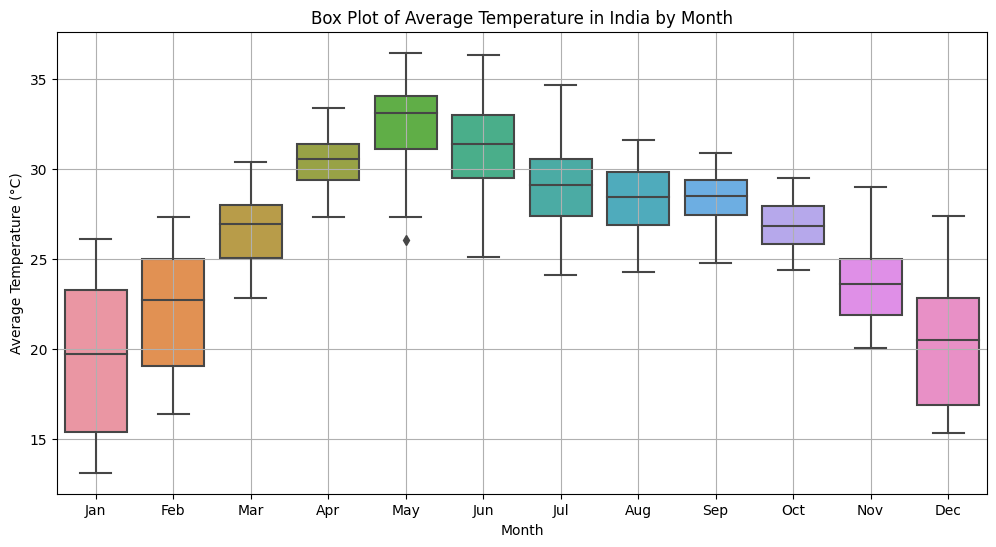

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


x = pd.to_datetime(df_temp[df_temp['country'] == 'India']['date'])
y = df_temp[df_temp['country'] == 'India']['avg_temp_c']

# Create a new DataFrame with the data
data = pd.DataFrame({'Date': x,
                     'Average Temperature (°C)': y})

# Extract the month from the date
data['Month'] = data['Date'].dt.month

# Create a figure with desired size
plt.figure(figsize=(12, 6))

# Create a box plot for each month
sns.boxplot(x=data['Month'], y=data['Average Temperature (°C)'], data=data)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Box Plot of Average Temperature in India by Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.grid(True)
plt.show()

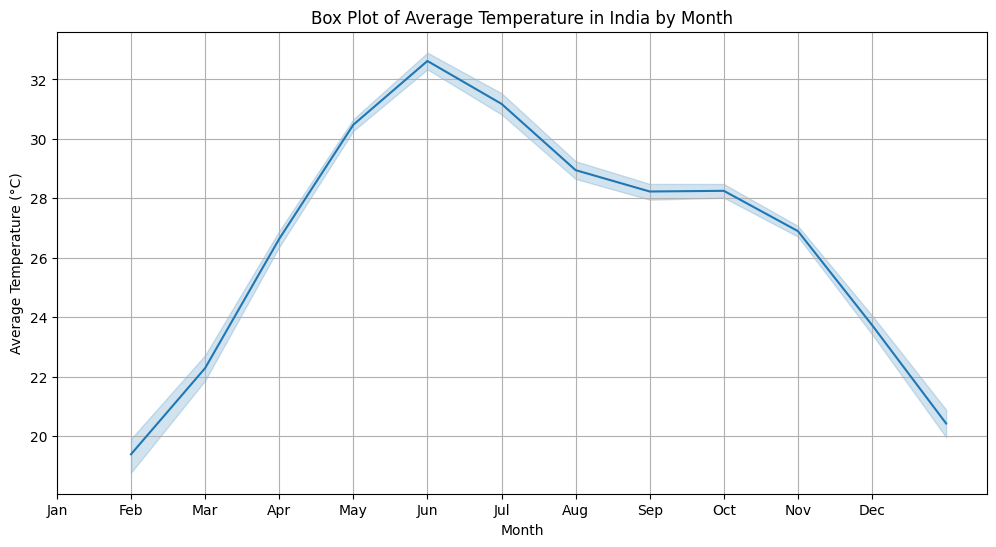

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


x = pd.to_datetime(df_temp[df_temp['country'] == 'India']['date'])
y = df_temp[df_temp['country'] == 'India']['avg_temp_c']

# Create a new DataFrame with the data
data = pd.DataFrame({'Date': x,
                     'Average Temperature (°C)': y})

# Extract the month from the date
data['Month'] = data['Date'].dt.month

# Create a figure with desired size
plt.figure(figsize=(12, 6))

# Create a box plot for each month
sns.lineplot(x=data['Month'], y=data['Average Temperature (°C)'], data=data)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Box Plot of Average Temperature in India by Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.grid(True)
plt.show()

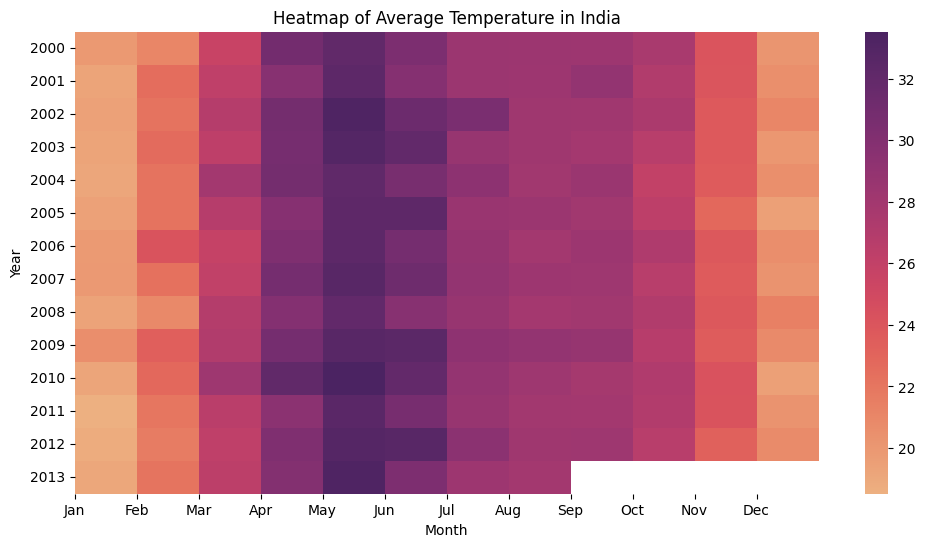

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert x-axis data to datetime objects
x = pd.to_datetime(df_temp[df_temp['country'] == 'India']['date'])

# Filter y-axis data
y = df_temp[df_temp['country'] == 'India']['avg_temp_c']

# Create a new DataFrame with the data
data = pd.DataFrame({'Date': x, 'Average Temperature (°C)': y})

# Extract the month and year from the date
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Create a pivot table with the average temperature for each month and year
pivot = data.pivot_table(values='Average Temperature (°C)', index='Year', columns='Month')

# Create a figure with desired size
plt.figure(figsize=(12, 6))

# Create a heatmap
sns.heatmap(pivot, cmap='flare')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Average Temperature in India')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.show()

### **Setting and removing indexes**

- `pandas` allows you to designate columns as an index.

In [69]:
# Set the index of temperatures to city
temp_index = df_temp.set_index('city')

# Look at temperatures_ind
display(temp_index)

# Reset the temperatures_ind index, keeping its contents
display(temp_index.reset_index())

# Reset the temperatures_ind index, dropping its contents
display(temp_index.reset_index(drop=True))

,Unnamed: 0,date,country,avg_temp_c
city,,,,
Abidjan,0,2000-01-01,Côte D'Ivoire,27.293
Abidjan,1,2000-02-01,Côte D'Ivoire,27.685
Abidjan,2,2000-03-01,Côte D'Ivoire,29.061
Abidjan,3,2000-04-01,Côte D'Ivoire,28.162
Abidjan,4,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...,...
Xian,16495,2013-05-01,China,18.979
Xian,16496,2013-06-01,China,23.522
Xian,16497,2013-07-01,China,25.251


,city,Unnamed: 0,date,country,avg_temp_c
0,Abidjan,0,2000-01-01,Côte D'Ivoire,27.293
1,Abidjan,1,2000-02-01,Côte D'Ivoire,27.685
2,Abidjan,2,2000-03-01,Côte D'Ivoire,29.061
3,Abidjan,3,2000-04-01,Côte D'Ivoire,28.162
4,Abidjan,4,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...,...,...
16495,Xian,16495,2013-05-01,China,18.979
16496,Xian,16496,2013-06-01,China,23.522
16497,Xian,16497,2013-07-01,China,25.251
16498,Xian,16498,2013-08-01,China,24.528


,Unnamed: 0,date,country,avg_temp_c
0,0,2000-01-01,Côte D'Ivoire,27.293
1,1,2000-02-01,Côte D'Ivoire,27.685
2,2,2000-03-01,Côte D'Ivoire,29.061
3,3,2000-04-01,Côte D'Ivoire,28.162
4,4,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...,...
16495,16495,2013-05-01,China,18.979
16496,16496,2013-06-01,China,23.522
16497,16497,2013-07-01,China,25.251
16498,16498,2013-08-01,China,24.528


### **Subsetting with** `df.loc[]`

In [70]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Using this we cannot subset both the cities
display(df_temp[df_temp["city"] == "Moscow"])

# Method: 1
# Subset temperatures using square brackets
display(df_temp[df_temp["city"].isin(cities)])

# Method: 2
# Subset temperatures_ind using .loc[]
display(df_temp.set_index(['city']).loc[cities])

,Unnamed: 0,date,city,country,avg_temp_c
10725,10725,2000-01-01,Moscow,Russia,-7.313
10726,10726,2000-02-01,Moscow,Russia,-3.551
10727,10727,2000-03-01,Moscow,Russia,-1.661
10728,10728,2000-04-01,Moscow,Russia,10.096
10729,10729,2000-05-01,Moscow,Russia,10.357
...,...,...,...,...,...
10885,10885,2013-05-01,Moscow,Russia,16.152
10886,10886,2013-06-01,Moscow,Russia,18.718
10887,10887,2013-07-01,Moscow,Russia,18.136
10888,10888,2013-08-01,Moscow,Russia,17.485


,Unnamed: 0,date,city,country,avg_temp_c
10725,10725,2000-01-01,Moscow,Russia,-7.313
10726,10726,2000-02-01,Moscow,Russia,-3.551
10727,10727,2000-03-01,Moscow,Russia,-1.661
10728,10728,2000-04-01,Moscow,Russia,10.096
10729,10729,2000-05-01,Moscow,Russia,10.357
...,...,...,...,...,...
13360,13360,2013-05-01,Saint Petersburg,Russia,12.355
13361,13361,2013-06-01,Saint Petersburg,Russia,17.185
13362,13362,2013-07-01,Saint Petersburg,Russia,17.234
13363,13363,2013-08-01,Saint Petersburg,Russia,17.153


,Unnamed: 0,date,country,avg_temp_c
city,,,,
Moscow,10725,2000-01-01,Russia,-7.313
Moscow,10726,2000-02-01,Russia,-3.551
Moscow,10727,2000-03-01,Russia,-1.661
Moscow,10728,2000-04-01,Russia,10.096
Moscow,10729,2000-05-01,Russia,10.357
...,...,...,...,...
Saint Petersburg,13360,2013-05-01,Russia,12.355
Saint Petersburg,13361,2013-06-01,Russia,17.185
Saint Petersburg,13362,2013-07-01,Russia,17.234


### **Setting multi-level indexes**

In [71]:
# Index temperatures by country & city
temp_index = df_temp.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("India", "New Delhi"), ("Pakistan", "Lahore")]

# Subset for rows to keep
display(temp_index.loc[rows_to_keep])

Unnamed: 0        date  avg_temp_c
country  city                                         
India    New Delhi       11550  2000-01-01      15.201
         New Delhi       11551  2000-02-01      16.388
         New Delhi       11552  2000-03-01      22.921
         New Delhi       11553  2000-04-01      31.266
         New Delhi       11554  2000-05-01      34.524
...                        ...         ...         ...
Pakistan Lahore           8575  2013-05-01      33.457
         Lahore           8576  2013-06-01      34.456
         Lahore           8577  2013-07-01      33.279
         Lahore           8578  2013-08-01      31.511
         Lahore           8579  2013-09-01         NaN

[330 rows x 3 columns]

### **Sorting by index values**

Previously, you changed the order of the rows in a DataFrame by calling .`sort_values()`. It's also useful to be able to sort by elements in the index. For this, you need to use `.sort_index()`.

In [72]:
# Index temperatures by country & city
temp_index = df_temp.set_index(["country", "city"])

# Sort temperatures_ind by index values
display(temp_index.sort_index())

# Sort temperatures_ind by index values at the city level
display(temp_index.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
display(temp_index.sort_index(level=["country", "city"], ascending=[True, False]))

Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]

Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan           2  2000-03-01      29.061
              Abidjan           3  2000-04-01      28.162
              Abidjan           4  2000-05-01      27.547
...                           ...         ...         ...
China         Xian          16495  2013-05-01      18.979
              Xian          16496  2013-06-01      23.522
              Xian          16497  2013-07-01      25.251
              Xian          16498  2013-08-01      24.528
              Xian          16499  2013-09-01         NaN

[16500 rows x 3 columns]

Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]

In [73]:
# Index temperatures by country & city
temp_index = df_temp.set_index(["country", "city"])

# Sort the index of temperatures_ind
temp_srt = temp_index.sort_index()

# Subset rows from India to Russia
display(temp_srt.loc["India" : "Russia"])

# Try to subset rows from New Delhi to Moscow
display(temp_srt.loc["New Delhi" : "Moscow"])

# Subset rows from India, New Delhi to Russia, Moscow
display(temp_srt.loc[("India", "New Delhi") : ("Russia", "Moscow")])

Unnamed: 0        date  avg_temp_c
country city                                                
India   Ahmadabad                330  2000-01-01      20.781
        Ahmadabad                331  2000-02-01      21.246
        Ahmadabad                332  2000-03-01      26.565
        Ahmadabad                333  2000-04-01      32.275
        Ahmadabad                334  2000-05-01      32.847
...                              ...         ...         ...
Russia  Saint Petersburg       13360  2013-05-01      12.355
        Saint Petersburg       13361  2013-06-01      17.185
        Saint Petersburg       13362  2013-07-01      17.234
        Saint Petersburg       13363  2013-08-01      17.153
        Saint Petersburg       13364  2013-09-01         NaN

[5610 rows x 3 columns]

,,Unnamed: 0,date,avg_temp_c
country,city,,,


Unnamed: 0        date  avg_temp_c
country city                                         
India   New Delhi       11550  2000-01-01      15.201
        New Delhi       11551  2000-02-01      16.388
        New Delhi       11552  2000-03-01      22.921
        New Delhi       11553  2000-04-01      31.266
        New Delhi       11554  2000-05-01      34.524
...                       ...         ...         ...
Russia  Moscow          10885  2013-05-01      16.152
        Moscow          10886  2013-06-01      18.718
        Moscow          10887  2013-07-01      18.136
        Moscow          10888  2013-08-01      17.485
        Moscow          10889  2013-09-01         NaN

[3630 rows x 3 columns]

### **Slicing in both directions**

In [74]:
# Index temperatures by country & city
temp_index = df_temp.set_index(["country", "city"])

# Sort the index of temperatures_ind
temp_srt = temp_index.sort_index()

# Subset rows from India, Hyderabad to Iraq, Baghdad
display(temp_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad")])

# Subset columns from date to avg_temp_c
display(temp_srt.loc[: , "date" : "avg_temp_c"])

# Subset in both directions at once
display(temp_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad"), "date":"avg_temp_c"])

Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]

date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]

date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]

In [75]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = df_temp[(df_temp["date"] >= "2010-01-01") & (df_temp["date"] <= "2011-12-31")]
display(temperatures_bool.head(3))

# Set date as an index and sort the index
temp_index = df_temp.set_index("date").sort_index()

# Use .loc[] to subset temp_index for rows in 2010 and 2011
display(temp_index.loc["2010":"2011"].head(3))

# Use .loc[] to subset temp_index for rows from Aug 2010 to Feb 2011
display(temp_index.loc["2010-08":"2011-02"].head(3))

,Unnamed: 0,date,city,country,avg_temp_c
120,120,2010-01-01,Abidjan,Côte D'Ivoire,28.270
121,121,2010-02-01,Abidjan,Côte D'Ivoire,29.262
122,122,2010-03-01,Abidjan,Côte D'Ivoire,29.596


,Unnamed: 0,city,country,avg_temp_c
date,,,,
2010-01-01,4905,Faisalabad,Pakistan,11.810
2010-01-01,10185,Melbourne,Australia,20.016
2010-01-01,3750,Chongqing,China,7.921


,Unnamed: 0,city,country,avg_temp_c
date,,,,
2010-08-01,2602,Calcutta,India,30.226
2010-08-01,12337,Pune,India,24.941
2010-08-01,6562,Izmir,Turkey,28.352


### **Subsetting by row/column number `df.iloc[]`**

In [76]:
# Get 23rd row, 2nd column (index 22, 1)
display(df_temp.iloc[22, 1])

# Use slicing to get the first 5 rows
display(df_temp.iloc[:5])

# Use slicing to get columns 3 to 4
display(df_temp.iloc[:, 2:4])

# Use slicing in both directions at once
display(df_temp.iloc[:5, 2:4])

'2001-11-01'

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


,city,country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
...,...,...
16495,Xian,China
16496,Xian,China
16497,Xian,China
16498,Xian,China


,city,country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire


### **Pivot temperature by `city` and `year`**

In [77]:
# Convert the date column to a datetime object
df_temp['date'] = pd.to_datetime(df_temp['date'])

# Add a year column to df_temp
df_temp["year"] = df_temp["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = df_temp.pivot_table(values=["avg_temp_c"],
                                                   index=["country", "city"],
                                                   columns="year")

# See the result
display(temp_by_country_city_vs_year)

avg_temp_c                                   \
year                                 2000       2001       2002       2003   
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333  20.889167   

                                                                            \
year                                 2004       2005       2006       2007   
country       city                                                           
Afghanistan   Kabul             16.128417  14.847500  15.798500  15.518000   
Angola        Luanda            24.216167  24.414583  24.138417  24.241583   
Australia     Melbourne         13.742083  14.378500  13.991083  14.991833   
              Sydney            17.869667  18.028083  17.749500  18.020833   
Bangladesh    Dhaka             26.136083  26.193333  26.440417  25.951333   
...                                   ...        ...        ...        ...   
United States Chicago           10.943417  11.583833  11.870500  11.448333   
              Los Angeles       16.552833  16.431417  16.623083  16.699917   
              New York          10.389500  10.681417  11.519250  10.627333   
Vietnam       Ho Chi Minh City  27.686583  27.884000  28.044000  27.866667   
Zimbabwe      Harare            20.307667  21.487417  20.699750  20.746250   

                                                                            \
year                                 2008       2009       2010       2011   
country       city                                                           
Afghanistan   Kabul             15.479250  15.093333  15.676000  15.812167   
Angola        Luanda            24.266333  24.325083  24.440250  24.150750   
Australia     Melbourne         14.110583  14.647417  14.231667  14.190917   
              Sydney            17.321083  18.175833  17.999000  17.713333   
Bangladesh    Dhaka             26.004500  26.535583  26.648167  25.803250   
...                                   ...        ...        ...        ...   
United States Chicago           10.242417  10.298333  11.815917  11.214250   
              Los Angeles       17.014750  16.677000  15.887000  15.874833   
              New York          10.641667  10.141833  11.357583  11.272250   
Vietnam       Ho Chi Minh City  27.611417  27.853333  28.281750  27.675417   
Zimbabwe      Harare            20.680500  20.523833  21.165833  20.781750   

                                                      
year                                 2012       2013  
country       city                                    
Afghanistan   Kabul             14.510333  16.206125  
Angola        Luanda            24.240083  24.553875  
Australia     Melbourne         14.268667  14.741500  
              Sydney            17.474333  18.089750  
Bangladesh    Dhaka             26.283583  26.587000  
...                                   ...        ...  
United States Chicago           12.821250  11.586889  
              Los Angeles       17.089583  18.120667  
              New York          11.971500  12.163889  
Vietnam       Ho Chi Minh City  28.248750  28.455000  
Zimbabwe      Harare            20.52

### **Subsetting pivot tables**

In [78]:
# Convert the date column to a datetime object
df_temp["date"] = pd.to_datetime(df_temp['date'])

# Add a year column 
df_temp["year"] = df_temp["date"].dt.year
print(df_temp.columns)

# Pivot avg_temp_c by country and city vs year
temp_ccy = df_temp.pivot_table(values=["avg_temp_c"],
                               index=["country", "city"],
                               columns="year")

# Convert column labels to integers
temp_ccy.columns = pd.to_numeric(temp_ccy.columns.get_level_values(1))
print(temp_ccy.columns)

# subset
sub_cc = temp_ccy.loc[("Egypt", "Cairo"):("India", "Delhi")]

# Subset in both directions at once (R:C)
display(sub_cc.loc[: ,  2005:2007])

Index(['Unnamed: 0', 'date', 'city', 'country', 'avg_temp_c', 'year'], dtype='object')
Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013],
           dtype='int64', name='year')


year                       2005       2006       2007
country  city                                        
Egypt    Cairo        22.006500  22.050000  22.361000
         Gizeh        22.006500  22.050000  22.361000
Ethiopia Addis Abeba  18.312833  18.427083  18.142583
France   Paris        11.552917  11.788500  11.750833
Germany  Berlin        9.919083  10.545333  10.883167
India    Ahmadabad    26.828083  27.282833  27.511167
         Bangalore    25.476500  25.418250  25.464333
         Bombay       27.035750  27.381500  27.634667
         Calcutta     26.729167  26.986250  26.584583
         Delhi        25.716083  26.365917  26.145667

`get_level_value()`

In [79]:
import pandas as pd

# Create a sample DataFrame with a MultiIndex columns
df = pd.DataFrame({('A', 1): [1, 2],
                   ('A', 2): [3, 4],
                   ('B', 1): [5, 6],
                   ('B', 2): [7, 8]})

# Display the DataFrame
display(df)
print("-"*40)

# Get the values of the second level of the columns MultiIndex
level_0_values = df.columns.get_level_values(0)
level_1_values = df.columns.get_level_values(1)
print(level_0_values)
print(level_1_values)

A     B   
   1  2  1  2
0  1  3  5  7
1  2  4  6  8

----------------------------------------
Index(['A', 'A', 'B', 'B'], dtype='object')
Int64Index([1, 2, 1, 2], dtype='int64')


### **Calculating on a pivot table**

In [80]:
# Convert the date column to a datetime object
df_temp["date"] = pd.to_datetime(df_temp['date'])

# Add a year column to df_temp
df_temp["year"] = df_temp["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_ccy = df_temp.pivot_table(values=["avg_temp_c"],
                               index=["country", "city"],
                               columns="year")

# Get the worldwide mean temp by year
temp_ccy_mean = temp_ccy.mean()

# Filter for the year that had the highest mean temp
display(temp_ccy_mean[temp_ccy_mean == temp_ccy_mean.max()])

# Get the mean temp by city
temp_ccy_city_mean = temp_ccy.mean(axis="columns")

# Filter for the city that had the lowest mean temp
display(temp_ccy_city_mean[temp_ccy_city_mean == temp_ccy_city_mean.min()])

            year
avg_temp_c  2013    20.312285
dtype: float64

country  city  
China    Harbin    4.876551
dtype: float64

### **Pandas DataTime**

In [81]:
import pandas as pd

# Create a sample dataframe with a column of strings representing dates
df = pd.DataFrame({"date_column": ["2021-01-01", "2022-02-03", "2023-03-06", "2024-12-01"]})

# Convert the "date_column" to datetime objects
df["date_column"] = pd.to_datetime(df["date_column"])

# Access year, month, and day components of the datetime objects
df["year"] = df["date_column"].dt.year
df["month"] = df["date_column"].dt.month
df["day"] = df["date_column"].dt.day

# Verify the resulting dataframe
print(df)

  date_column  year  month  day
0  2021-01-01  2021      1    1
1  2022-02-03  2022      2    3
2  2023-03-06  2023      3    6
3  2024-12-01  2024     12    1


## **04 → Creating and Visualizing DataFrames**

In [82]:
import pandas as pd

url = 'https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/raw/main/04_Data%20Manipulation%20with%20pandas/_dataset/avoplotto.pkl'
df_avocados = pd.read_pickle(url)

print(df_avocados.head())  # Print the first few rows of the DataFrame

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


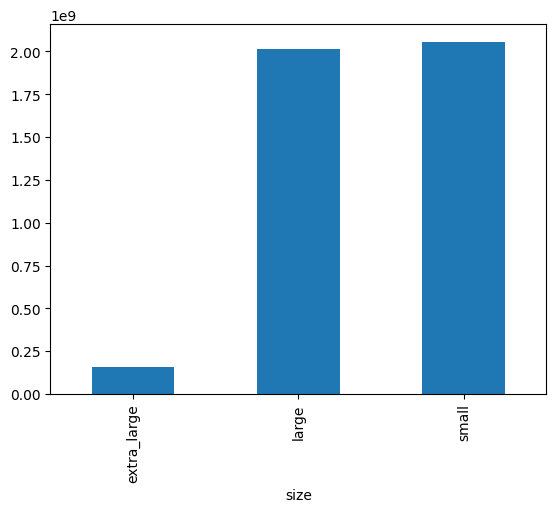

In [83]:
# Get the total number of avocados sold of each size
nb_sold_by_size = df_avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

It looks like small avocados were the most-purchased size, but large avocados were a close second.

### **Changes in sales over time**

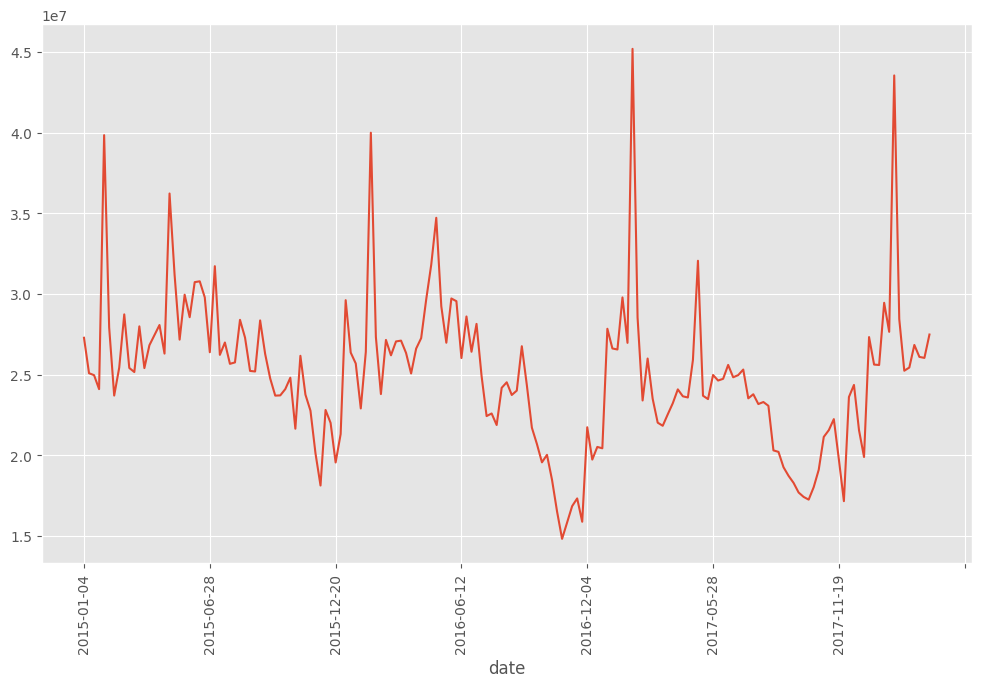

In [84]:

# Get the total number of avocados sold on each date
nb_sold_by_date = df_avocados.groupby(["date"])["nb_sold"].sum()

plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line", rot=90)
plt.show()

it looks like the number of avocados spikes around the same time each year.

### **Avocado supply and demand**

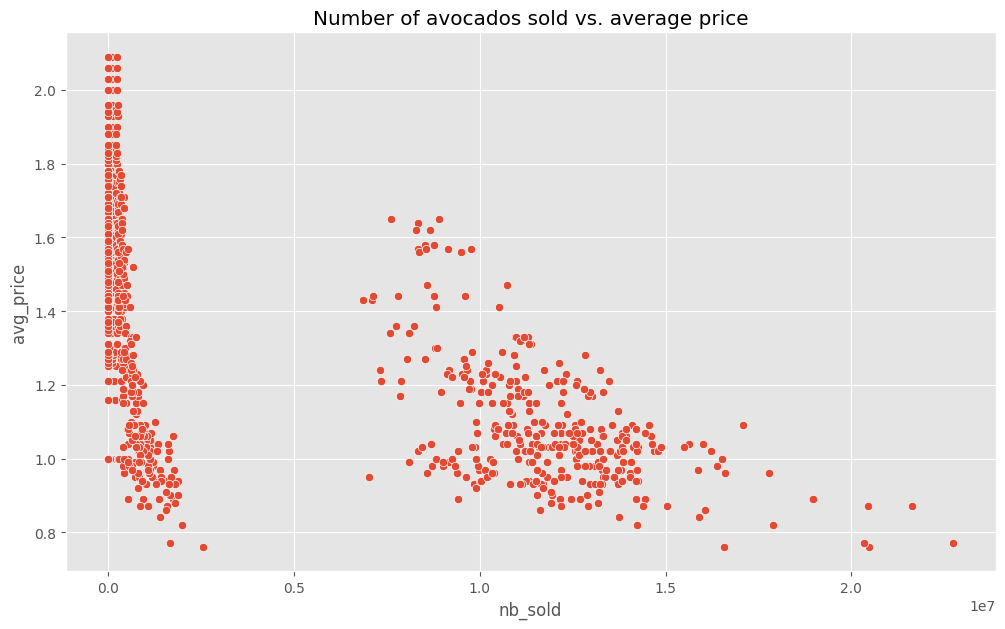

In [85]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))

# Scatter plot of nb_sold vs avg_price with title
sns.scatterplot(x=df_avocados['nb_sold'],
                y=df_avocados['avg_price'],
                data=df_avocados)
plt.title('Number of avocados sold vs. average price')
plt.show()

It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that they're correlated with each other.

### **Price of conventional vs. organic avocados**

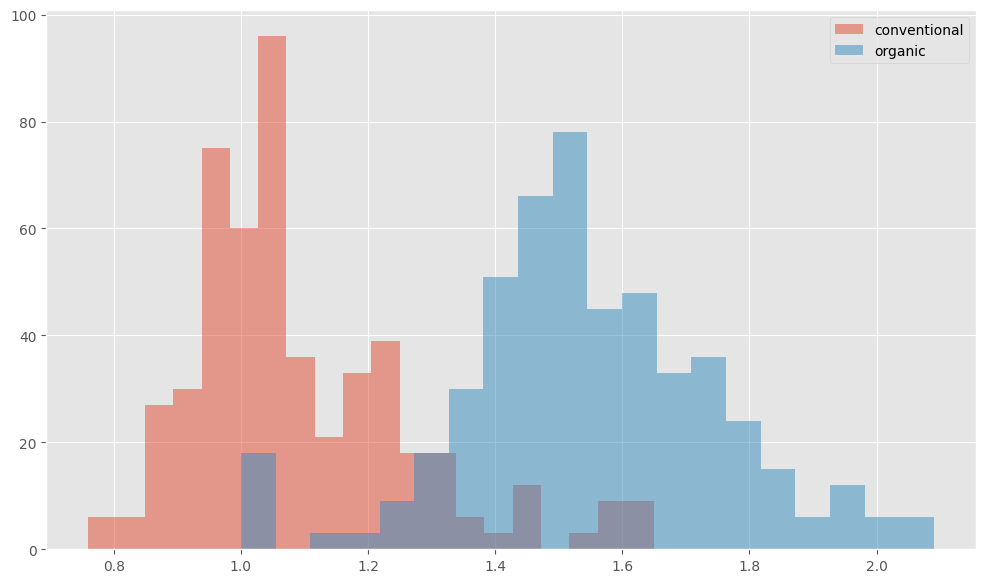

In [86]:
plt.figure(figsize=(12, 7))

# Modify bins to 20
df_avocados[df_avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
df_avocados[df_avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

plt.style.use('ggplot')
plt.legend(["conventional", "organic"])
plt.show()

We can see that on average, `organic avocados` are more expensive than `conventional` ones, but their price distributions have some overlap

### **Ploting the Missing values as histogram**

Name      False
Age        True
Height     True
Weight     True
Salary     True
dtype: bool


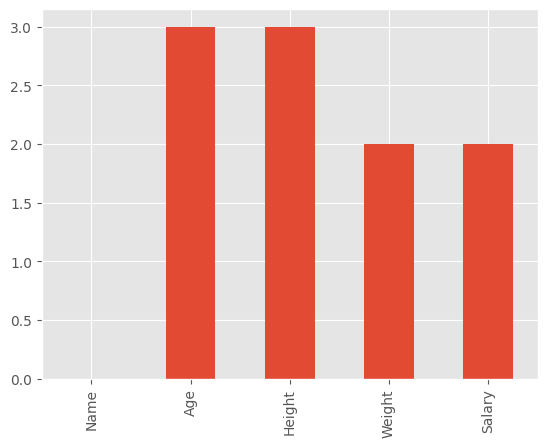

In [87]:
import pandas as pd
import numpy as np

# Create a sample DataFrame

data = {'Name': ['Alice', 'Bob', 'Charlie', 'Dave', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack'],
        'Age': [25, np.nan, 28, 35, np.nan, 55, 59, np.nan, 62, 78],
        'Height': [160, np.nan, 175, np.nan, 155, 176, np.nan, 178, 171, 167],
        'Weight': [50, 70, 90, np.nan, 60, 56, 67, np.nan, 56, 100],
        'Salary': [5000, 5500, 6000, np.nan, 9000, 3000, np.nan, 4000, 11000, 7000]}

df = pd.DataFrame(data)


# Check each column for missing values
print(df.isna().any())

# Bar plot of missing values by variable
df.isna().sum().plot(kind='bar')

# Show plot
plt.show()

### **Removing missing values**

In [88]:
# dropna() - Remove rows with missing values
df_drop = df.dropna()

# Check if any columns contain missing values
print(df_drop.isna().any())
display(df_drop)

Name      False
Age       False
Height    False
Weight    False
Salary    False
dtype: bool


,Name,Age,Height,Weight,Salary
0,Alice,25.0,160.0,50.0,5000.0
2,Charlie,28.0,175.0,90.0,6000.0
5,Frank,55.0,176.0,56.0,3000.0
8,Ivy,62.0,171.0,56.0,11000.0
9,Jack,78.0,167.0,100.0,7000.0


### **Replacing missing values(Imputation)**

In [89]:
df

,Name,Age,Height,Weight,Salary
0,Alice,25.0,160.0,50.0,5000.0
1,Bob,NaN,NaN,70.0,5500.0
2,Charlie,28.0,175.0,90.0,6000.0
3,Dave,35.0,NaN,NaN,NaN
4,Eve,NaN,155.0,60.0,9000.0
5,Frank,55.0,176.0,56.0,3000.0
6,Grace,59.0,NaN,67.0,NaN
7,Henry,NaN,178.0,NaN,4000.0
8,Ivy,62.0,171.0,56.0,11000.0
9,Jack,78.0,167.0,100.0,7000.0


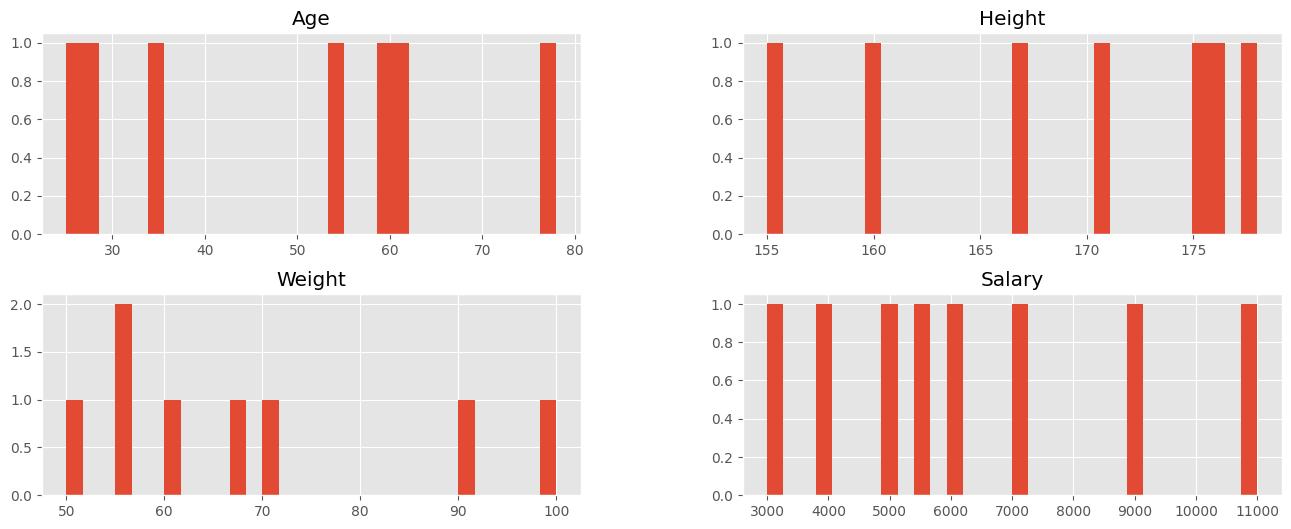

In [90]:
plt.style.use('ggplot')

# From previous step
cols_with_missing = ["Age", "Height", "Weight", "Salary"]
df[cols_with_missing].hist(bins=30, figsize=(16, 6))
plt.show()

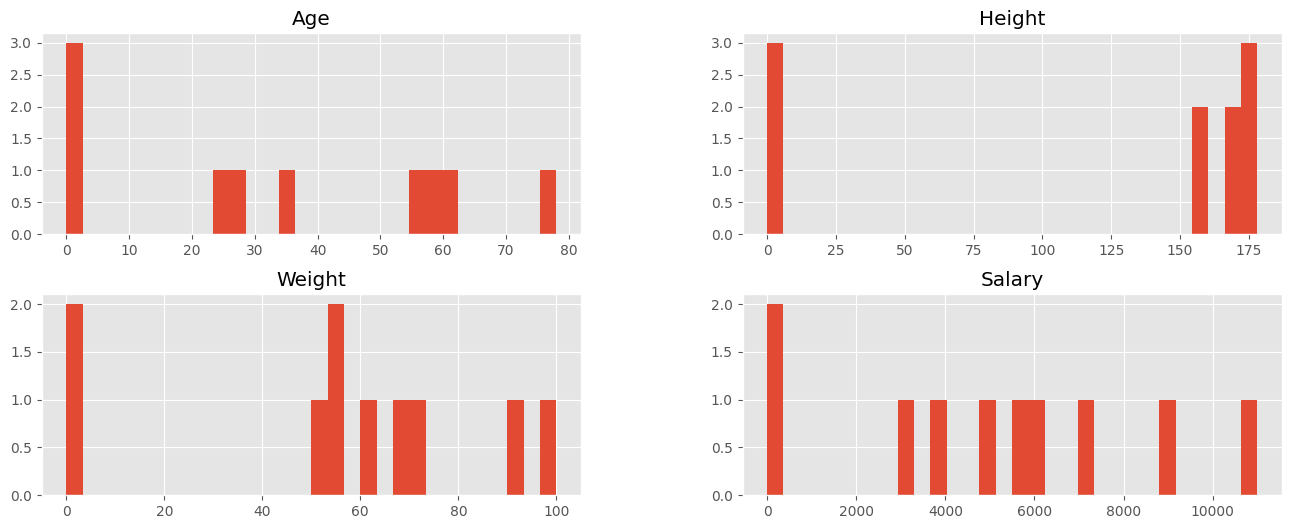

In [91]:
plt.style.use('ggplot')

# Fill in missing values with 0
avocados_filled = df.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist(bins=30, figsize=(16, 6))

# Show the plot
plt.show()

Notice how the distribution has changed shape after replacing missing values with zeros

### **List of dictionaries**

In [92]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


### **Dictionary of lists**

In [93]:
# Create a dictionary of lists with new data
avocados_dict = {
    "date": ["2019-11-17", "2019-12-01"],
    "small_sold": [10859987, 9291631],
    "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


### **CSV to DataFrame**

**DataSet:** `airline_bumping.csv`

In [96]:
# Take a look at the DataFrame
print(airline_bumping.head())

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


Create a new column of `airline_totals` called `bumps_per_10k`, which is the number of passengers bumped per `10,000` passengers in `2016` and `2017`.

In [101]:
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
ALASKA AIRLINES           1392          36543121       0.380920
AMERICAN AIRLINES        11115         197365225       0.563169
DELTA AIR LINES           1591         197033215       0.080748
EXPRESSJET AIRLINES       3326          27858678       1.193883
FRONTIER AIRLINES         1228          22954995       0.534960
HAWAIIAN AIRLINES          122          16577572       0.073593
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
SOUTHWEST AIRLINES       18585         228142036       0.814624
SPIRIT AIRLINES           2920          32304571       0.903897
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365


### **DataFrame to CSV**

In [105]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values(["bumps_per_10k"], ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
EXPRESSJET AIRLINES       3326          27858678       1.193883
SPIRIT AIRLINES           2920          32304571       0.903897
SOUTHWEST AIRLINES       18585         228142036       0.814624
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
AMERICAN AIRLINES        11115         197365225       0.563169
FRONTIER AIRLINES         1228          22954995       0.534960
ALASKA AIRLINES           1392          36543121       0.380920
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365
DELTA AIR LINES           1591         197033215       0.080748
HAWAIIAN AIRLINES          122          16577572       0.073593


<p align='center'>
  <a href="#"><img src='https://tymsai.netlify.app/resource/1.gif' height='10' width=100% alt="div"></a>
</p>

#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/